In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('../../dataset2001_2024.csv')
df.tail()

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_KT,CLOUD_AMT,T2M,PS,PW,WD10M,WD50M,WS50M,WS10M,TOA_SW_DNI,QV2M,QV10M
201595,2023,12,31,19,2.92,0.15,0.67,31.79,28.00,93.33,2.72,155.45,154.80,6.44,5.66,1408.66,11.47,11.29
201596,2023,12,31,20,0.80,0.13,0.58,20.45,25.87,93.38,2.70,152.49,152.07,7.36,6.12,1408.61,11.72,11.66
201597,2023,12,31,21,0.05,0.16,0.38,31.40,23.62,93.45,2.70,148.69,148.45,7.88,6.21,1408.76,12.08,12.02
201598,2023,12,31,22,0.00,-999.00,-999.00,21.06,21.87,93.52,2.71,145.60,145.61,7.41,5.61,0.00,12.45,12.39
201599,2023,12,31,23,0.00,-999.00,-999.00,22.94,20.82,93.55,2.72,140.66,140.22,6.68,4.93,0.00,12.70,12.70


In [40]:
df.replace(-999.0, 0, inplace=True)
df.tail()

,YEAR,MO,DY,HR,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,CLRSKY_KT,CLOUD_AMT,T2M,PS,PW,WD10M,WD50M,WS50M,WS10M,TOA_SW_DNI,QV2M,QV10M
201595,2023,12,31,19,2.92,0.15,0.67,31.79,28.00,93.33,2.72,155.45,154.80,6.44,5.66,1408.66,11.47,11.29
201596,2023,12,31,20,0.80,0.13,0.58,20.45,25.87,93.38,2.70,152.49,152.07,7.36,6.12,1408.61,11.72,11.66
201597,2023,12,31,21,0.05,0.16,0.38,31.40,23.62,93.45,2.70,148.69,148.45,7.88,6.21,1408.76,12.08,12.02
201598,2023,12,31,22,0.00,0.00,0.00,21.06,21.87,93.52,2.71,145.60,145.61,7.41,5.61,0.00,12.45,12.39
201599,2023,12,31,23,0.00,0.00,0.00,22.94,20.82,93.55,2.72,140.66,140.22,6.68,4.93,0.00,12.70,12.70


In [41]:
df['T2M_trend'] = df['T2M'].rolling(window=24).mean()
df['T2M_trend'].fillna(df['T2M'].mean(), inplace=True)

C:\Users\Natan Guedes\AppData\Local\Temp\ipykernel_32756\2692871358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['T2M_trend'].fillna(df['T2M'].mean(), inplace=True)


In [42]:
import pywt

def dwt_transform(data, wavelet='db4', level = 2):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    return coeffs

coefficients = dwt_transform(df['T2M_trend'].values)
trend_componnets = coefficients[0]

In [43]:
df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day', 'HR': 'hour'}, inplace=True)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)


In [44]:
train = df[df['datetime'].dt.year < 2023]
test = df[df['datetime'].dt.year == 2023]

X_train = train.drop(columns=['T2M', 'datetime'])
y_train = train['T2M']
X_test = test.drop(columns=['T2M', 'datetime'])
y_test = test['T2M']

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)

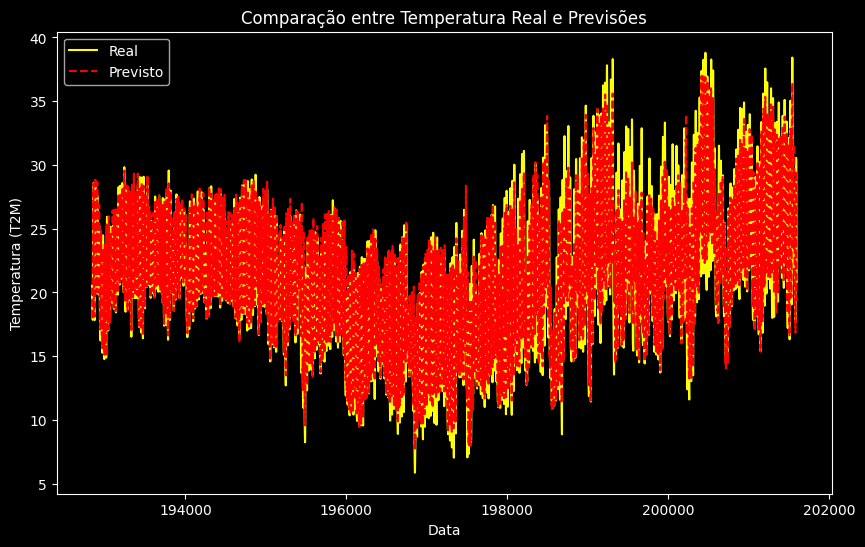

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Real", color='yellow')
plt.plot(y_test.index, y_pred, label="Previsto", linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('Temperatura (T2M)')
plt.title('Comparação entre Temperatura Real e Previsões')
plt.legend()
plt.show()